In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
slopes_array = np.load('slopes.npy')
intercept_array = np.load('intercept.npy')
data = np.vstack((slopes_array, intercept_array)).T

In [3]:
mean_vector = np.mean(data, axis=0)
covariance_matrix = np.cov(data, rowvar=False)

In [4]:
mean_vector

array([-0.02509307,  1.47657237])

In [5]:
covariance_matrix

array([[ 5.27384370e-05, -3.10535987e-03],
       [-3.10535987e-03,  2.15270209e-01]])

In [6]:
distribution = multivariate_normal(mean=mean_vector, cov=covariance_matrix)

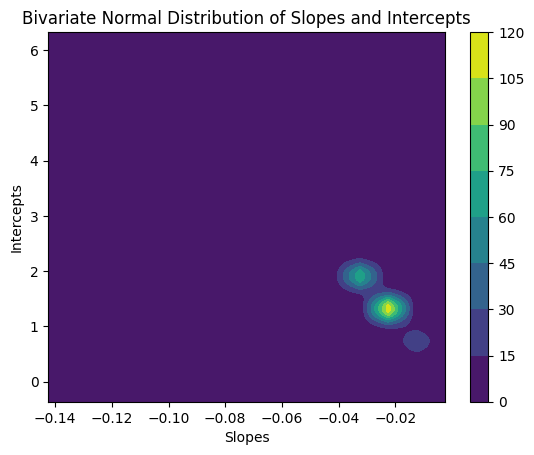

In [7]:
x, y = np.mgrid[slopes_array.min():slopes_array.max():.01, intercept_array.min():intercept_array.max():.01]
pos = np.dstack((x, y))
z = distribution.pdf(pos)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.contourf(x, y, z, cmap=cm.viridis)
fig.colorbar(cax)
plt.xlabel('Slopes')
plt.ylabel('Intercepts')
plt.title('Bivariate Normal Distribution of Slopes and Intercepts')
plt.show()

In [43]:
num_samples = 300
random_samples = distribution.rvs(size=num_samples)

In [44]:
filtered_samples = random_samples[(random_samples[:, 0] >= -0.04) & (random_samples[:, 0] <= 0) &
                                  (random_samples[:, 1] >= 1) & (random_samples[:, 1] <= 2)]

In [45]:
len(filtered_samples)

230

In [46]:
generated_slopes = filtered_samples[:100, 0]
generated_intercepts = filtered_samples[:100, 1]

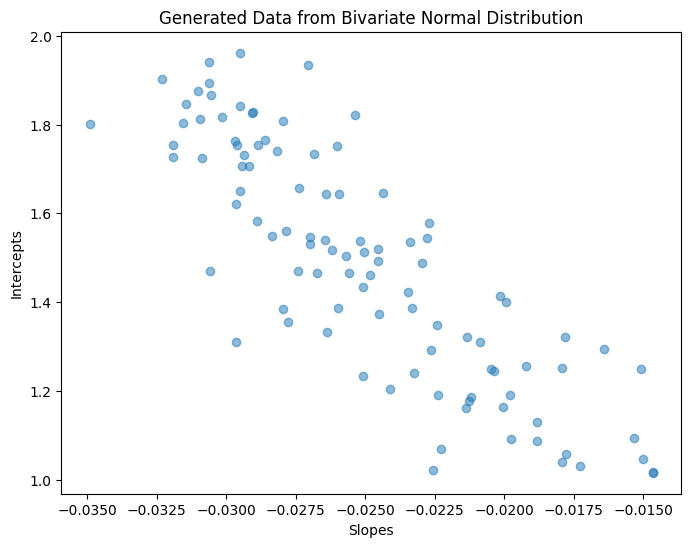

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(generated_slopes, generated_intercepts, alpha=0.5)
plt.xlabel('Slopes')
plt.ylabel('Intercepts')
plt.title('Generated Data from Bivariate Normal Distribution')
plt.show()

In [48]:
profiles_list = []
for slope, intercept in zip(generated_slopes, generated_intercepts):
    profile = []
    for t in range(120):
        T = 24 - (intercept / slope) + (200 - 24 + (intercept / slope)) * np.exp(slope * (t))
        profile.append(T)
    profiles_list.append(profile)

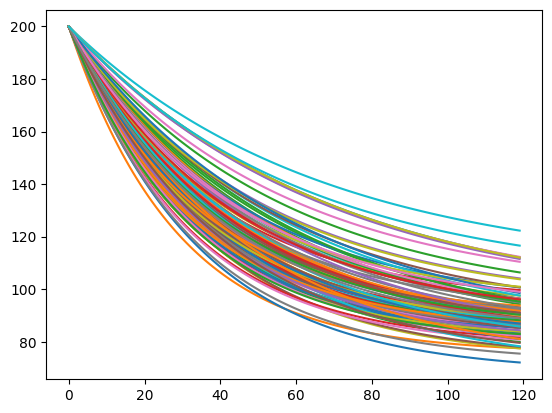

In [49]:
for i in range(100):
    plt.plot(profiles_list[i])
plt.show()

In [50]:
my_dict = {}
for i in range(100):
    my_dict[i] = profiles_list[i]

In [51]:
import pickle

In [52]:
with open('profile_dict.pkl', 'wb') as f:
    pickle.dump(my_dict, f)